<img style="float:left" width="70%" src="pics/escudo_COLOR_1L_DCHA.png">
<img style="float:right" width="15%" src="pics/PythonLogo.svg">
<br style="clear:both;">

# Técnicas de procesamiento de imágenes. Histogramas y agrupamiento.

En este **Notebook**, se realizará la práctica 3 de la parte de laboratorio de la asignatura. Se aplicarán técnicas asociadas al **histograma** de una imagen, y al **agrupamiento de datos**, para imágenes en color.

## Autor
- Pedro Latorre Carmona
- Álvaro Manjón Vara

# Visualización de la imagen y de su histograma


In [1]:
%matplotlib inline

In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from skimage import io

In [3]:
'''
Obtención y visualización de la imagen
'''
nombre2 = "CameramanB-BW.png"

img = io.imread(nombre2)

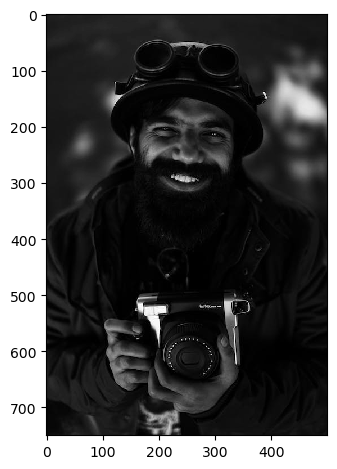

In [4]:
io.imshow(img)

In [5]:
img.shape

(750, 500)

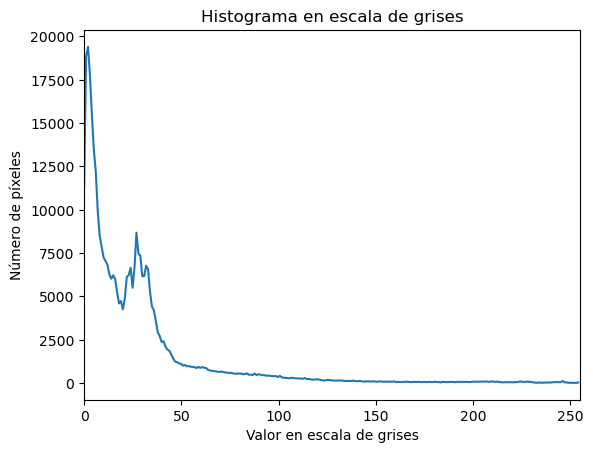

In [6]:
# =====================================================================
# Creación del histograma
histogram, bin_edges = np.histogram(img, bins=256, range=(0, 255))

# Configuración de la figura
plt.figure()
plt.title("Histograma en escala de grises")
plt.xlabel("Valor en escala de grises")
plt.ylabel("Número de píxeles")
plt.xlim([0, 255]) 

plt.plot(bin_edges[0:-1], histogram) 
plt.show()

## Umbralización

Text(0.5, 1.0, 'Umbral = Media')

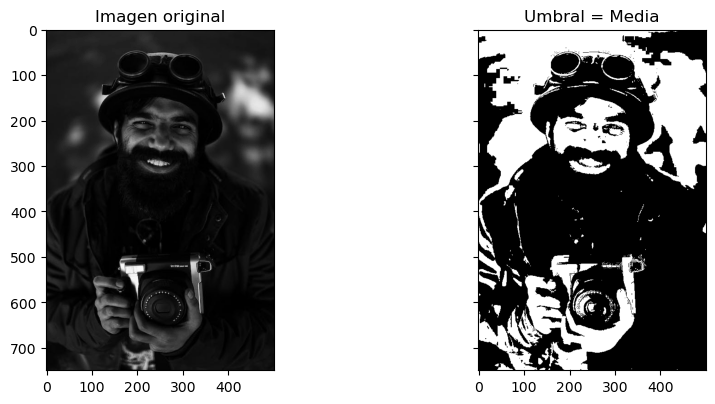

In [7]:
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank, threshold_local
from skimage.util import img_as_ubyte
from skimage.filters import threshold_mean

thresh = threshold_mean(img)
binary = img > thresh

fig, axes = plt.subplots(1, 2, figsize=(9, 4), sharex=True, sharey=True)
ax = axes.ravel()
plt.tight_layout()

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title('Imagen original')

ax[1].imshow(binary, cmap=plt.cm.gray)
ax[1].set_title('Umbral = Media')

### Mínimo entre máximos

In [8]:
import imageio as iio
import numpy as np
from scipy.ndimage import maximum_filter, minimum_filter
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt

def minimo_entre_maximos(image):   
    image = iio.v3.imread(image)

    # Aplicamos el filtro de máximo y mínimo a la imagen
    max_image = maximum_filter(image, size=3)
    min_image = minimum_filter(image, size=3)

    # Calculamos la diferencia entre las imágenes filtradas
    diff_image = np.subtract(max_image, min_image)

    # Umbralizamos la imagen resultante utilizando Otsu
    thresh = threshold_otsu(diff_image)
    thresholded_image = diff_image > thresh
    
    # Representamos la imagen original y la umbralizada
    fig, axes = plt.subplots(1, 2, figsize=(9, 4), sharex=True, sharey=True)
    ax = axes.ravel()
    plt.tight_layout()

    ax[0].imshow(image, cmap='gray')
    ax[0].set_title('Imagen original')

    ax[1].imshow(thresholded_image, cmap='gray')
    ax[1].set_title('Umbral = Media')

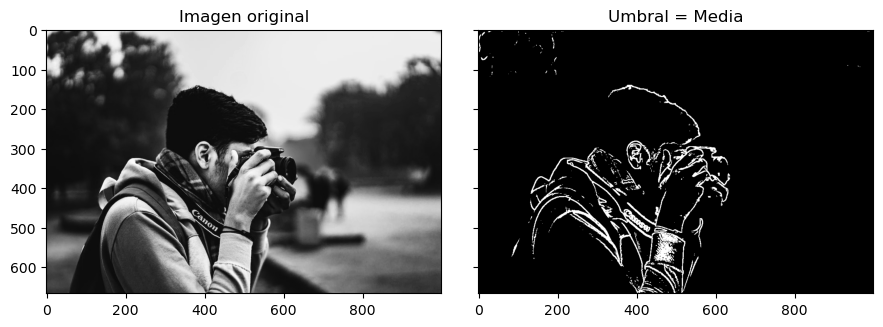

In [9]:
minimo_entre_maximos('Cameraman-BW.png')

### Método de Otsu

In [10]:
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank, threshold_local
from skimage.util import img_as_ubyte
from skimage.filters import threshold_otsu

def otsu(image):

    image = iio.v3.imread(image)
    
    # Umbralizamos la imagen resultante utilizando Otsu
    thresh = threshold_otsu(image)
    binary = image > thresh

    # Representamos la imagen original y la umbralizada
    fig, axes = plt.subplots(1, 2, figsize=(9, 4), sharex=True, sharey=True)
    ax = axes.ravel()
    plt.tight_layout()

    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_title('Imagen original')

    ax[1].imshow(binary, cmap=plt.cm.gray)
    ax[1].set_title('Umbral = Media')

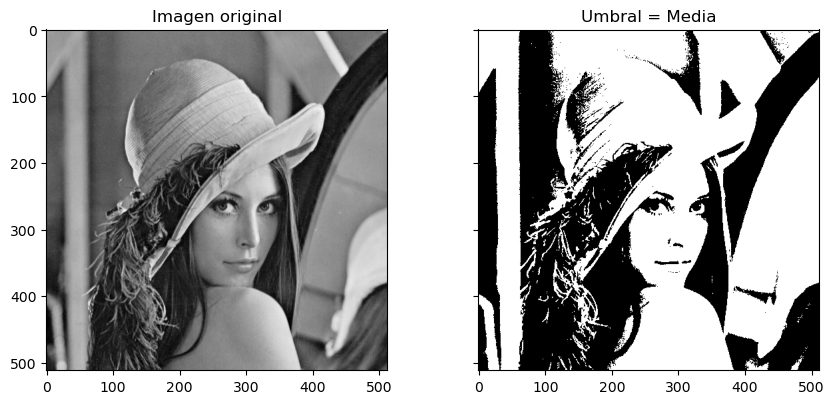

In [11]:
otsu('lena.png')

### Método isodata

In [12]:
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank, threshold_local
from skimage.util import img_as_ubyte
from skimage.filters import threshold_isodata

def isodata(image):

    image = iio.v3.imread(image)
    
    # Umbralizamos la imagen resultante utilizando isodata
    thresh = threshold_isodata(image)
    binary = image > thresh

    # Representamos la imagen original y la umbralizada
    fig, axes = plt.subplots(1, 2, figsize=(9, 4), sharex=True, sharey=True)
    ax = axes.ravel()
    plt.tight_layout()

    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_title('Imagen original')

    ax[1].imshow(binary, cmap=plt.cm.gray)
    ax[1].set_title('Umbral = Media')

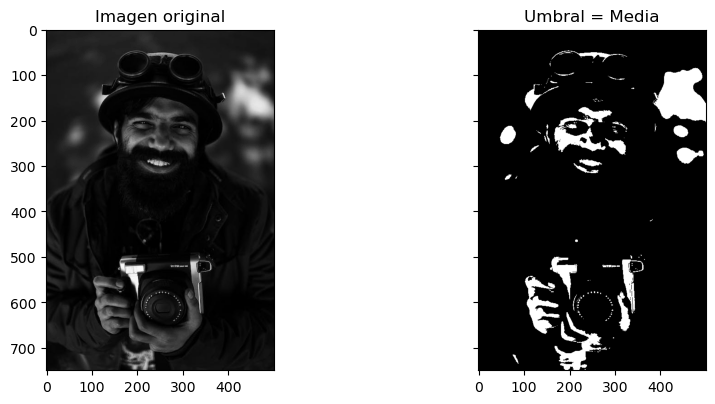

In [13]:
isodata('CameramanB-BW.png')

## Agrupamiento de datos mediante **K-Means** y/o **Fuzzy C-Means**

En esta parte de la práctica tenéis que implementar **K-Means** o **FCM** sobre dos de las tres imágenes en color que os he dejado en la carpeta. Tenéis que analizar el efecto de los diferentes parámetros en el resultado de la segmentación, de la forma lo más adecuada posible.

In [18]:
import imageio as iio
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def k_means(image, k):
    image = iio.v3.imread(image)

    # Transformamos la imagen a un formato de dos dimensiones
    X = image.reshape(image.shape[0] * image.shape[1], image.shape[2])

    # Aplicamos el método de agrupación K-Means a la imagen
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)

    # Obtenemos las etiquetas de cada pixel
    labels = kmeans.labels_
    
    # Representamos la imagen original y la clusterizada
    fig, axes = plt.subplots(1, 2, figsize=(9, 4), sharex=True, sharey=True)
    ax = axes.ravel()
    plt.tight_layout()

    ax[0].imshow(image)
    ax[0].set_title('Imagen original')

    ax[1].imshow(labels.reshape(image.shape[0], image.shape[1]))
    ax[1].set_title(str(k) + ' clusters')

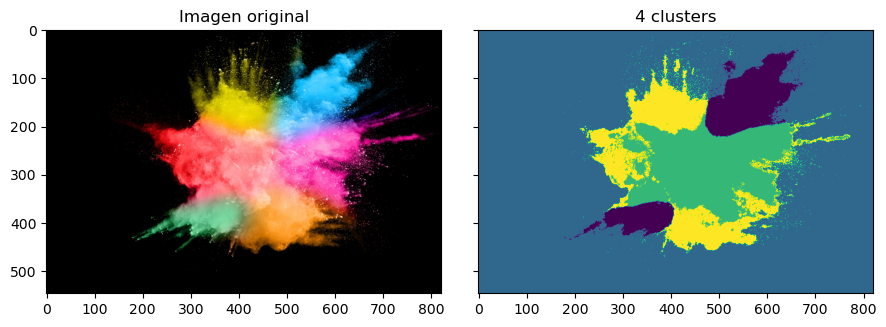

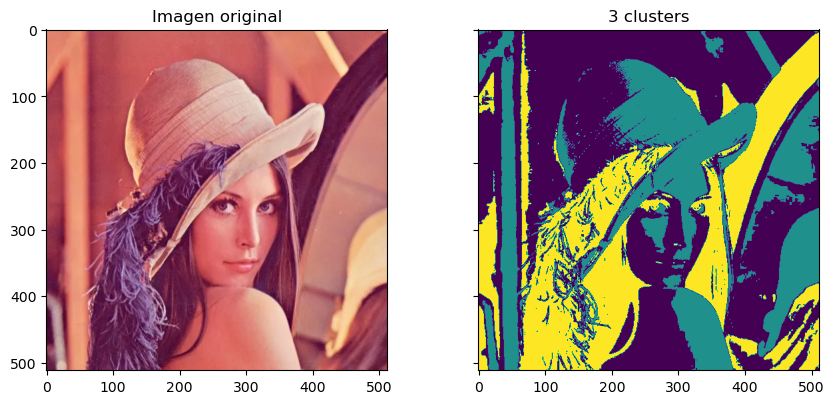

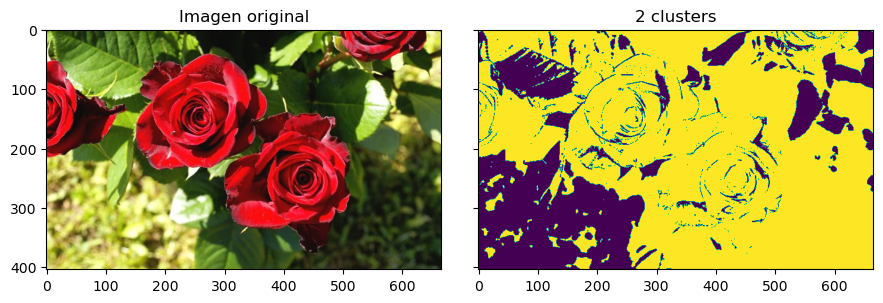

In [19]:
k_means('ColourImage.png',4)
k_means('Lena-Colour.png', 3)
k_means('Roses.png',2)